In [2]:
import numpy as np
import re
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

#import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
#import seaborn as sns

%matplotlib inline

%run ProcessData.ipynb
%run PlottingMethods.ipynb


#to save images : plt.savefig('foo.png', format='png', dpi=600)

# Running code

##      <span style="color:orange">A.  LSA</span>

###      <span style="color:green"><u>Traveling Salesman Problem</u></span>

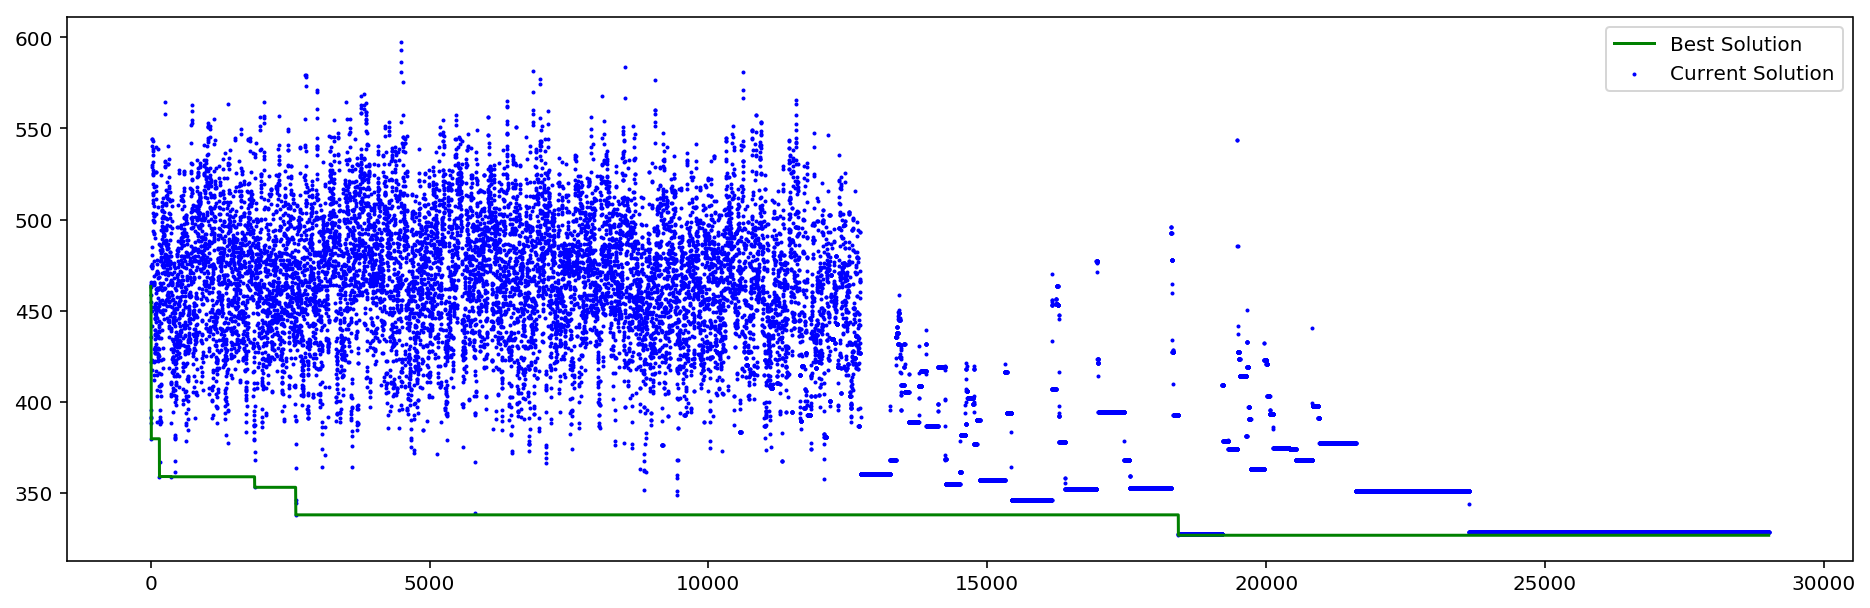

In [3]:
path = "../java/SimulatedAnnealing/GraphData/LSA_TSP.txt"
acceptance_pb, acc_best_sol, temp, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA2(best_y, curr_y)#, temp, acceptance_pb, acc_best_sol, 10000)


----
###      <span style="color:green"><u>Min Function</u></span>

In [4]:
def processDataLSA(pathTXT):

    acceptance_pb = []
    acc_best_sol = []
    temp = []
    best_y = []
    curr_y = []
    runtime = 0
    iteration_nbr = 0


    with open(pathTXT, "r") as file:
        dimension = file.readline().count('BEST x')
        best_xs = np.zeros((dimension, 0))
        curr_xs = np.zeros((dimension, 0))

        for line in file:
            if(line.startswith("Runtime")):
                runtime = float(re.sub("[^0-9^.]", "", line))
            elif(line.startswith("Nbr")):
                iteration_nbr = int(re.sub("[^0-9]", "", line))
            else:
                final = 5
                a = line.split("|")
                a = [i.strip() for i in a][:-1]
                acceptance_pb.append(float(a[0]))
                acc_best_sol.append(a[1])
                temp.append(float(a[2]))
                best_y.append(float(a[3]))
                curr_y.append(float(a[4]))

                best_xs_temp = np.zeros((dimension, 1))
                curr_xs_temp = np.zeros((dimension, 1))
                for i in range(dimension):
                    index = i*2
                    best_xs_temp[i] = float(a[final+index])
                    curr_xs_temp[i] = float(a[final+index+1])
                best_xs = np.concatenate((best_xs, best_xs_temp), axis = 1)
                curr_xs = np.concatenate((curr_xs, curr_xs_temp), axis = 1)
                
    acceptance_pb = np.asarray(acceptance_pb)
    acc_best_sol = np.asarray(acc_best_sol)
    temp = np.asarray(temp)
    best_y = np.asarray(best_y)
    curr_y = np.asarray(curr_y)
    
    return acceptance_pb, acc_best_sol, temp, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr

def drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, prob_factor):
    set_matplotlib_formats('retina')

    x = np.arange(len(best_y))
    string = str(prob_factor)
    line1, = plt.plot(x, best_y, color='g')
    line2, = plt.plot(x, temp, color='orange')
    plt.scatter(x, curr_y, s=1, label='Current Solution', color='blue')
    plt.scatter(x, acceptance_pb*prob_factor, s=1, label='Acceptance proba x'+string, color='pink')

    line1.set_label('Best Solution')
    line2.set_label('Temperature')

    fig = plt.gcf()
    fig.set_size_inches(10,6)
    plt.legend(prop={'size': 12})
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=12)
    ax.tick_params(axis='y', which='major', labelsize=12)
    plt.xlabel('Number of iterations', fontsize=12)
    plt.ylabel('BestSol° CurrentSol° Temperature AcceptProba', fontsize=12)
    plt.xlim([0, 1500])
    plt.savefig('/Users/leobouraux/Desktop/foo.png', format='png', dpi=333)
    plt.show()
    
    
import matplotlib.colors as colors

def truncate_colormap(cmap_str, minval=0.0, maxval=1.0, n=100):
    cmap = plt.get_cmap(cmap_str)
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

#arr = np.linspace(0, 50, 100).reshape((10, 10))
#fig, ax = plt.subplots(ncols=2)

#cmap_str = 'Greys'
#new_cmap = truncate_colormap(cmap_str, 0.1, 1)
#ax[0].imshow(arr, interpolation='nearest', cmap=cmap_str)
#ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
#plt.show()

def drawSolutionDSAMF(curr_y, best_y, curr_x, best_x):
    set_matplotlib_formats('retina')

    cm = plt.cm.get_cmap(truncate_colormap('Greys', 0.1, 1))
    lenY = len(curr_y)

    x = np.linspace(-5, 5, 10000)
    y = np.log(0.1*np.sin(30*x) + 0.01*np.power(x, 4) - 0.1 *np.power(x,2) +1)+1;
    #y = np.log(0.1*np.sin(10*x) + 0.01*np.power(x, 4) - 0.1 *np.power(x,2) +1)+1+0.7*x*x;

    line1, = plt.plot(x, y, color='k',linewidth=0.3 , zorder=1)
    line1.set_label('Objective function')
    
    sc = plt.scatter(curr_x, curr_y, c=range(lenY), vmin=0, vmax=lenY, s=20, label='Current Solution', cmap=cm, zorder=10)
    plt.scatter(best_x, best_y, s=50, marker="x", label='Best Solution', color='red', zorder=100)

    ax = plt.gca()
    #ax.set_facecolor('navajowhite')
    ax.tick_params(axis='x', which='major', labelsize=14)
    ax.tick_params(axis='y', which='major', labelsize=14)
    fig = plt.gcf()
    fig.set_size_inches(10,12)
    plt.legend(prop={'size': 14})
    plt.xlabel('x', fontsize=14)
    plt.ylabel('2D function f(x)', fontsize=14)
    
    cbar = plt.colorbar(sc)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label('Iteration n°', labelpad=-40, rotation=0, y=1.05, fontsize=14)
    
    plt.savefig('/Users/leobouraux/Desktop/foo.png', format='png', dpi=333)
    plt.show()

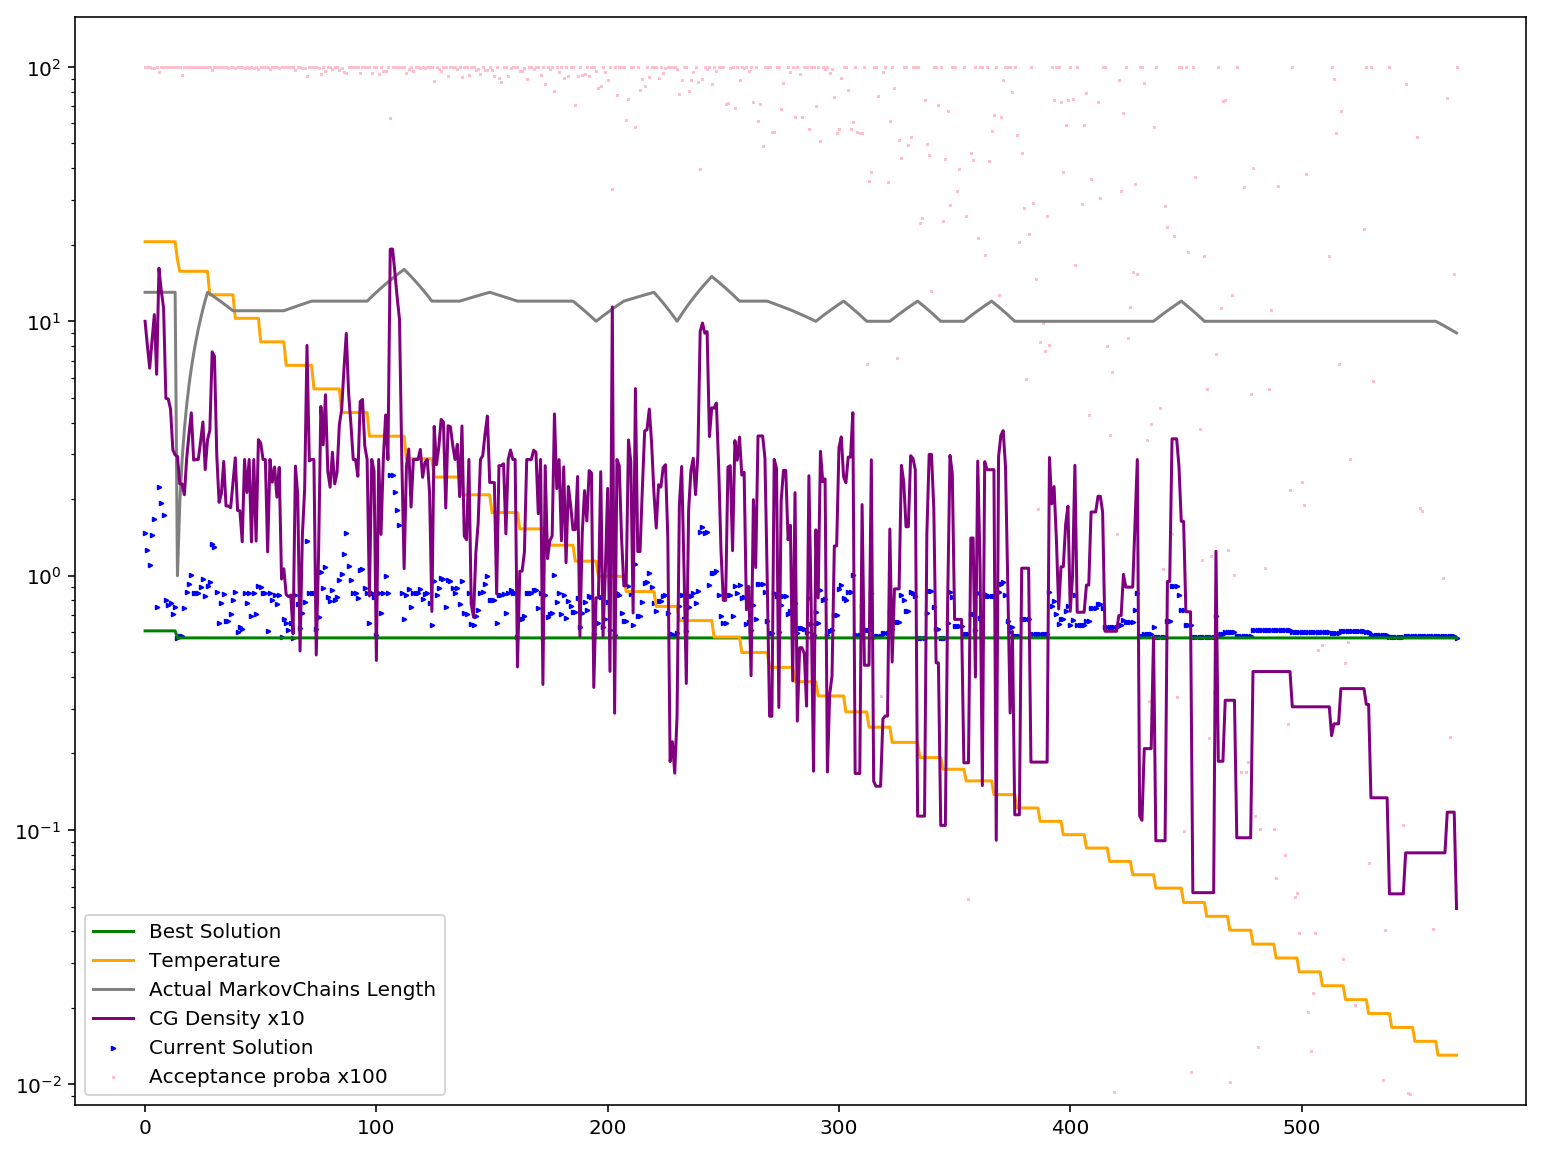

In [9]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)

drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

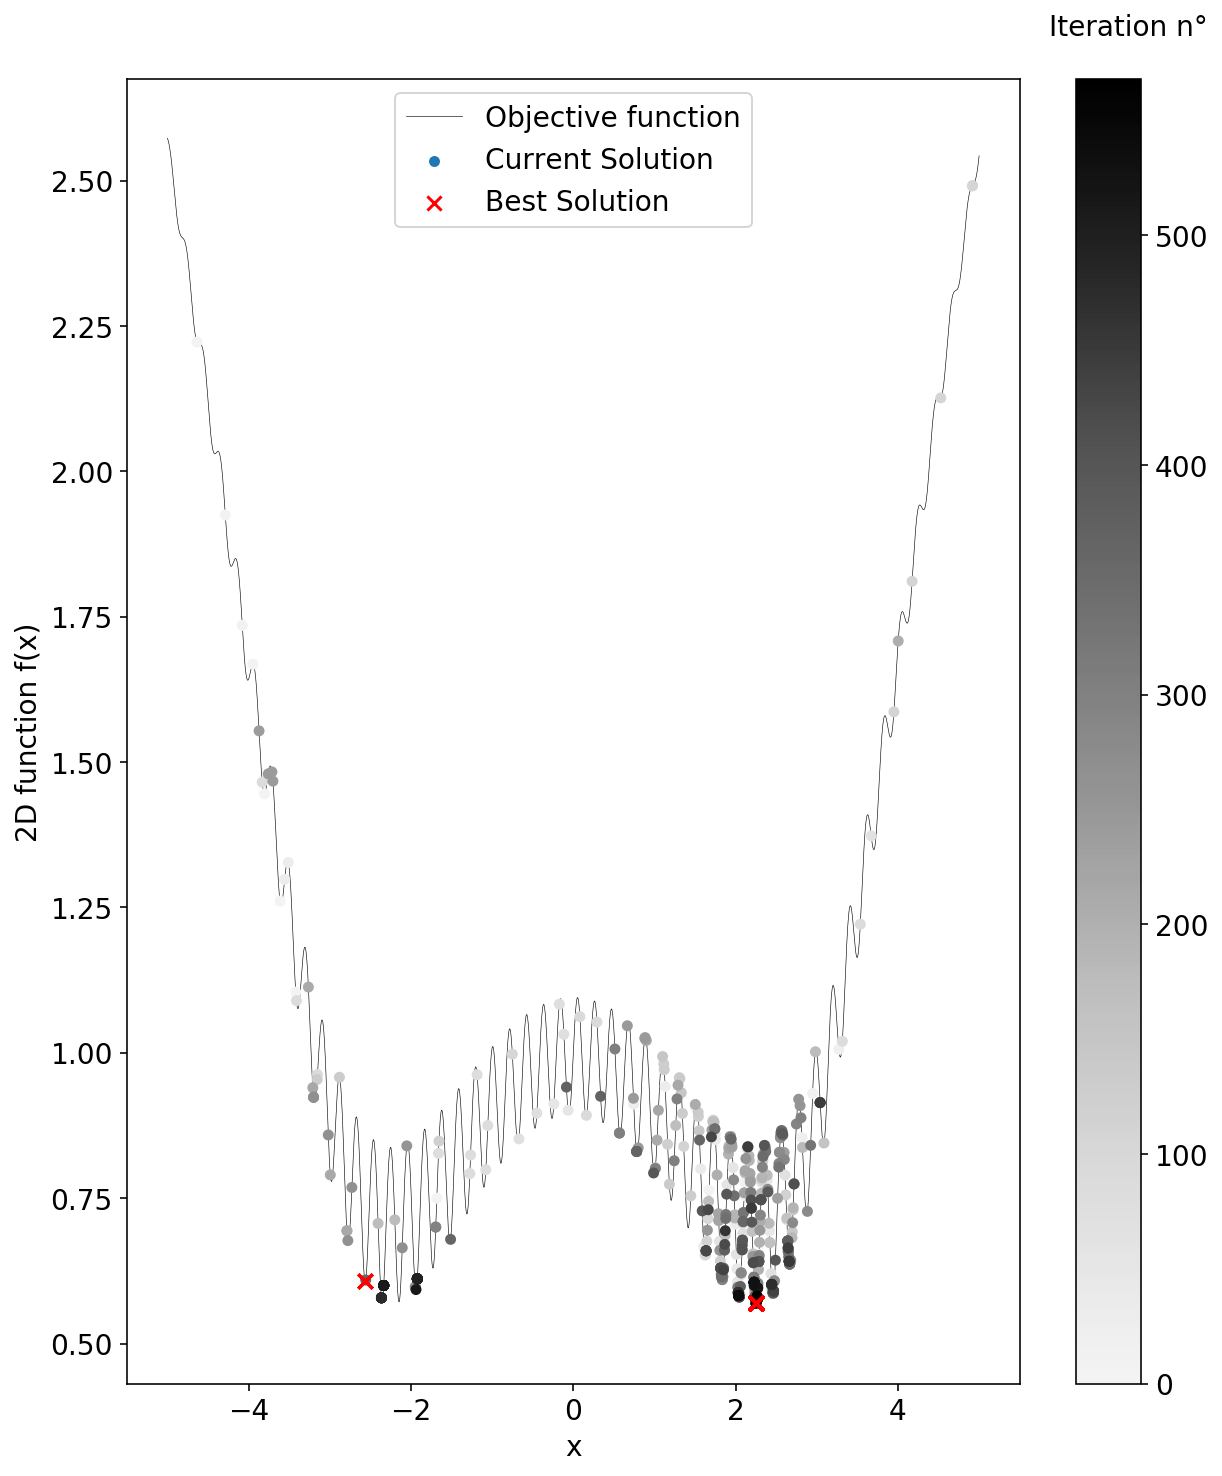

In [10]:
curr_x = curr_xs[0]
best_x = best_xs[0]
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

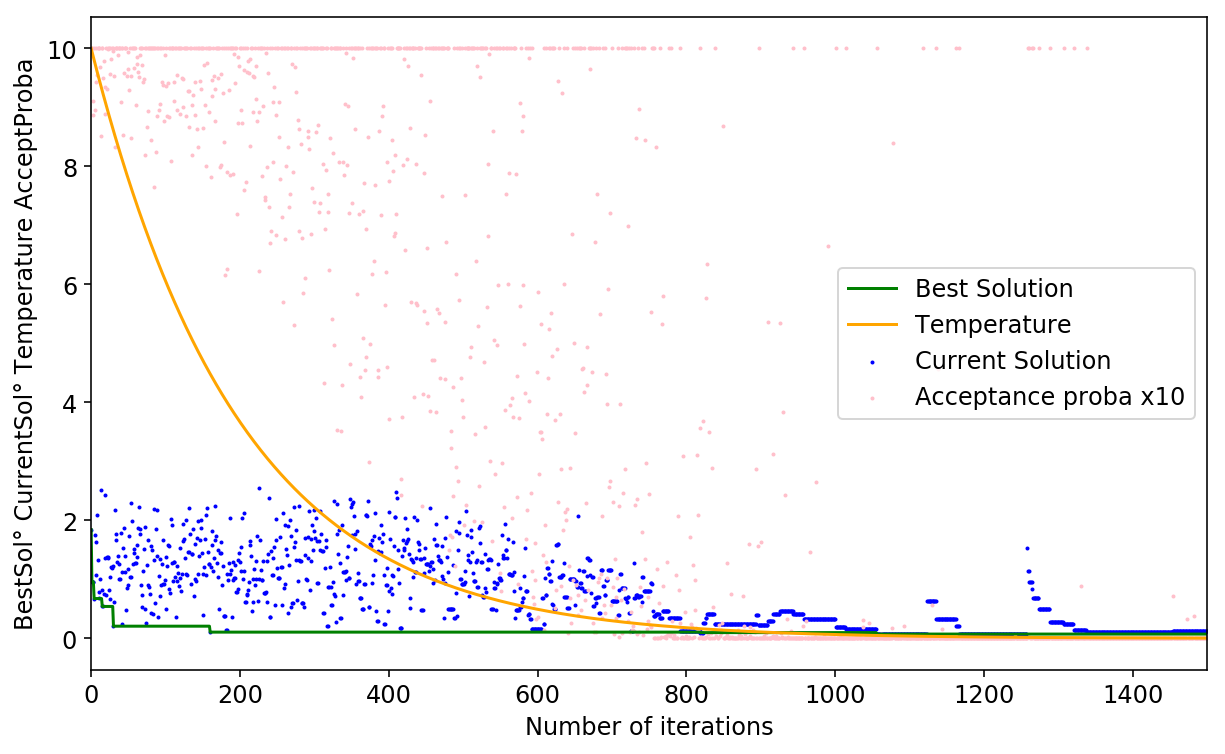

In [6]:
path = "../java/SimulatedAnnealing/GraphData/LSA_MinFunction3D.txt"
acceptance_pb, acc_best_sol, temp, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataLSA(path)
drawPlotLSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, 10)


----

##      <span style="color:orange">B.  DSA</span>

###      <span style="color:green"><u>Min Function</u></span>

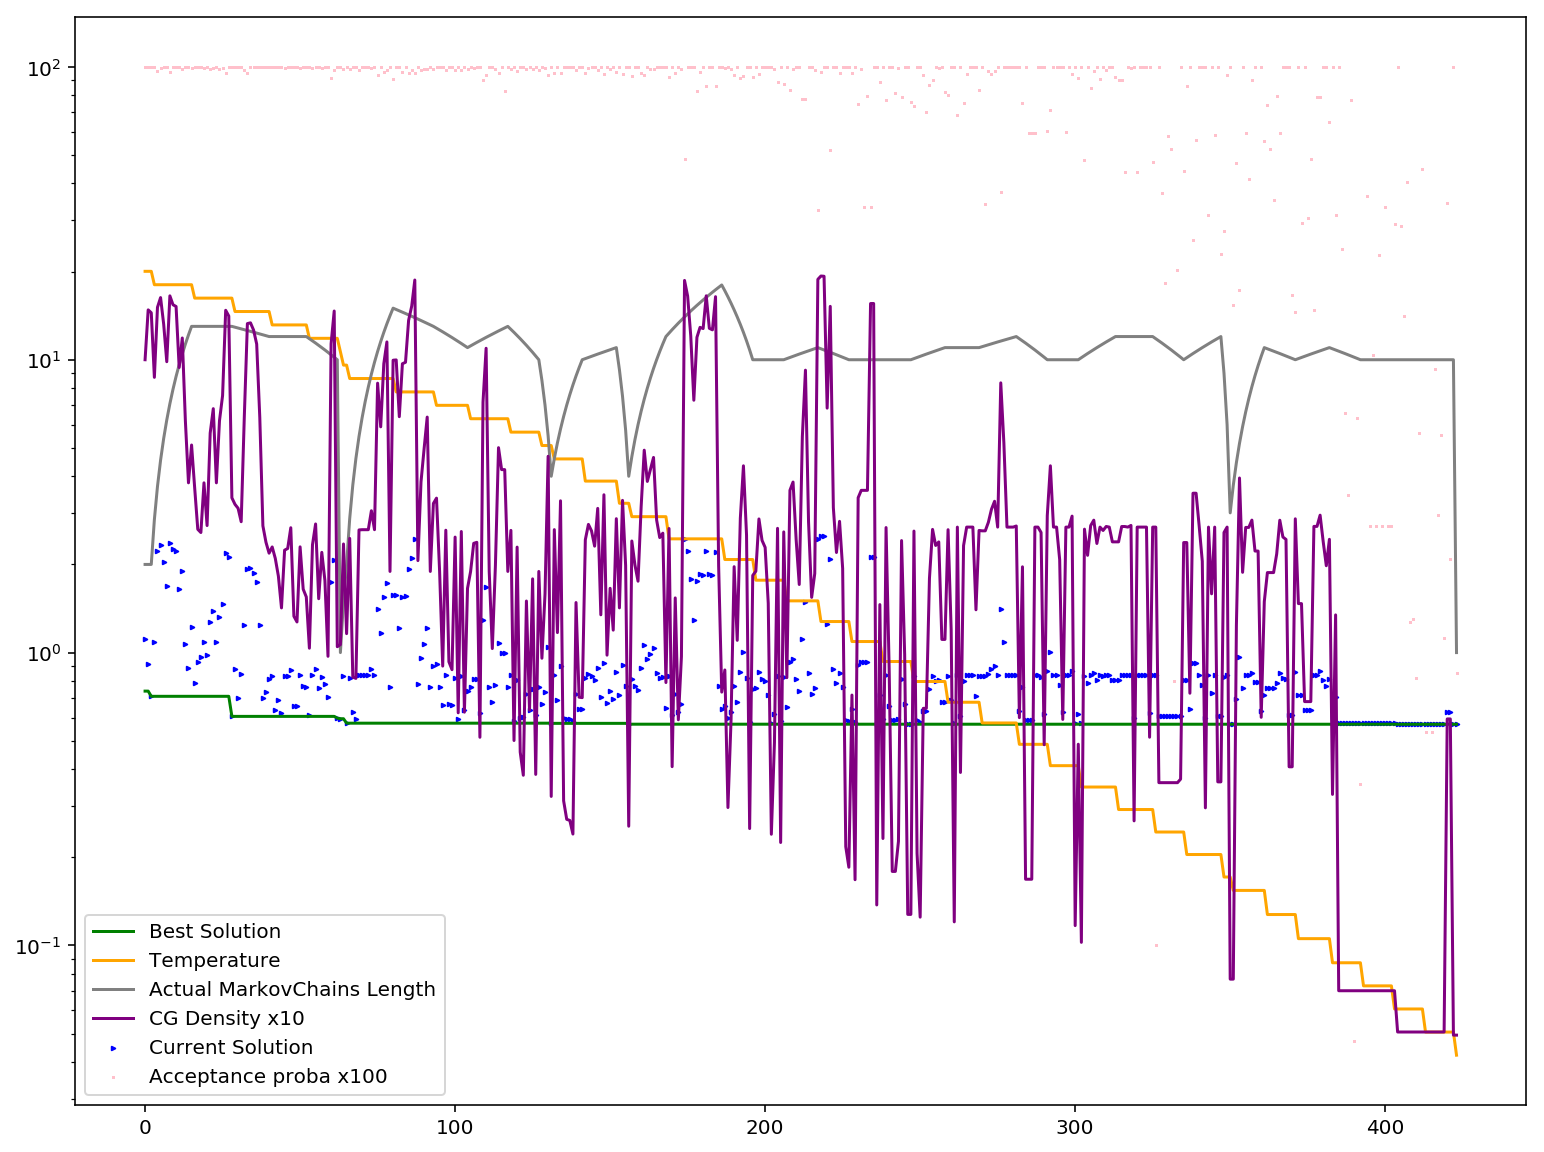

In [11]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)

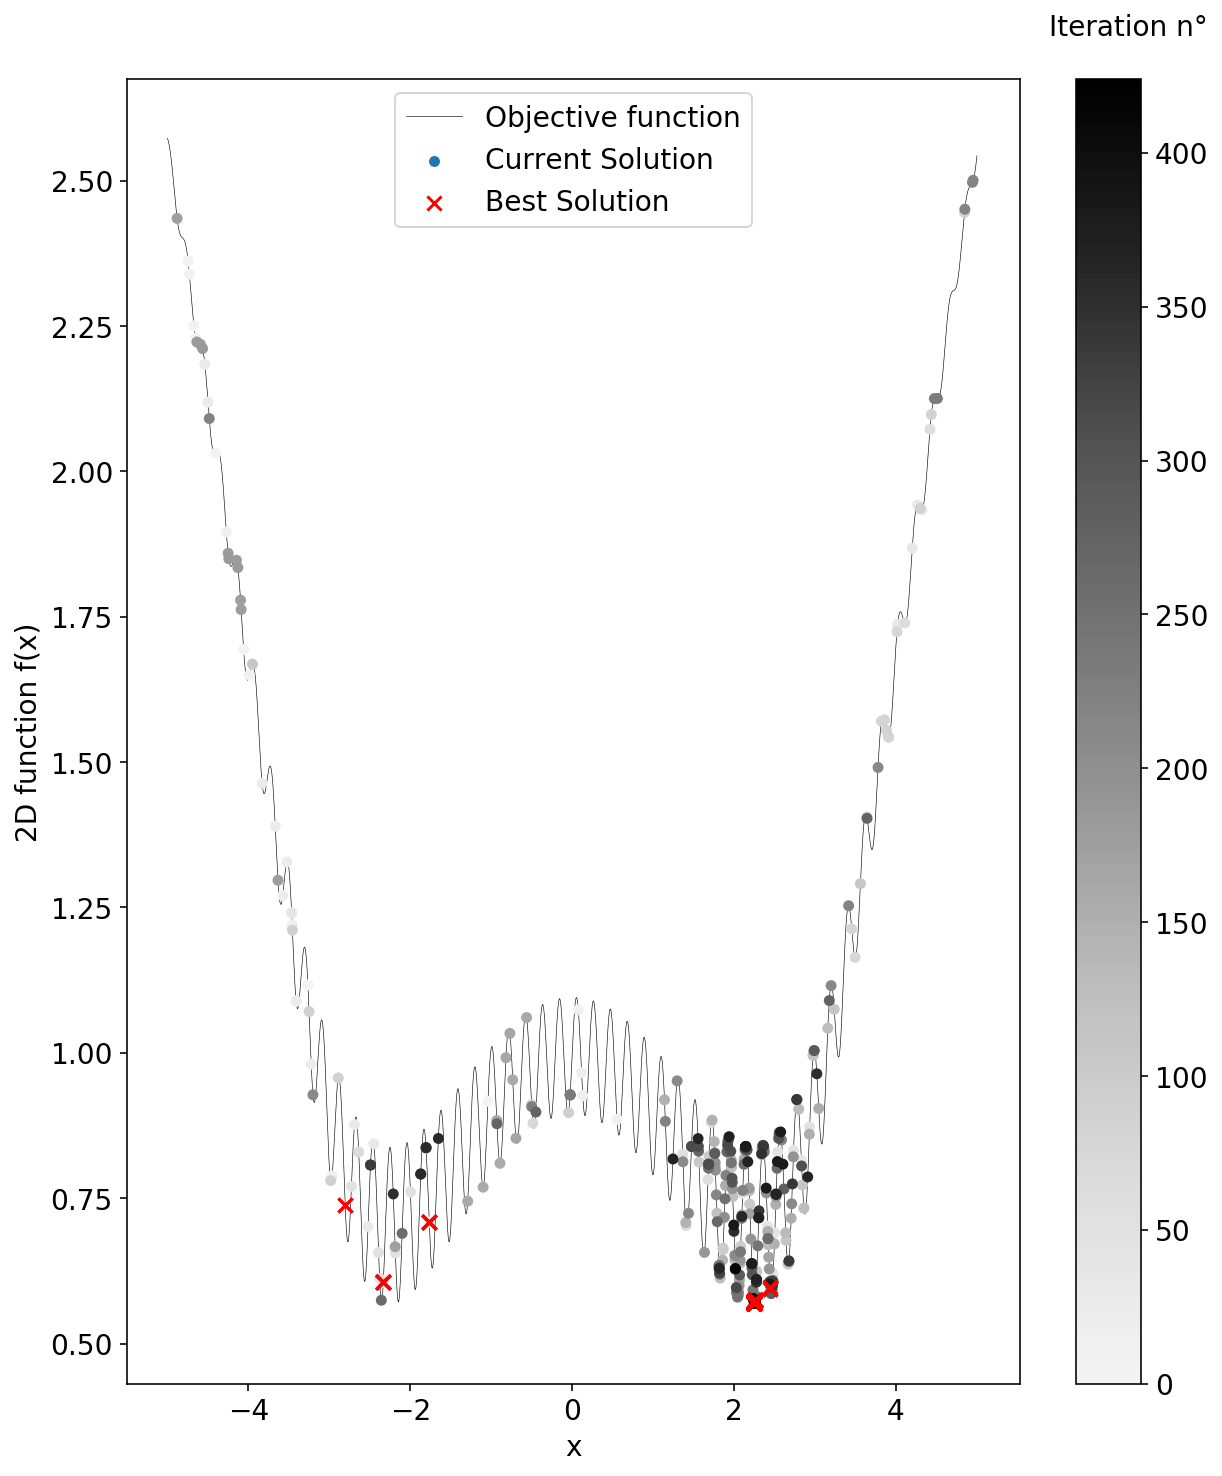

In [12]:
curr_x = curr_xs[0]
best_x = best_xs[0]
drawSolutionDSAMF(curr_y, best_y, curr_x, best_x)

###      <span style="color:green"><u>Min Function 3D</u></span>

In [13]:
def drawSolutionDSAMF3D(curr_y, best_y, curr_x, best_x):
    set_matplotlib_formats('retina')
    CMAP = "Spectral_r"#"viridis"
    
    N = 1000
    x = np.linspace(-10, 10, N)
    y = np.linspace(-10, 10, N).reshape(-1, 1)
    X, Y = np.meshgrid(x, y)
    Z = np.sin(-0.15*(x*x+y*y))+0.05*(np.power(x+np.pi, 2)+np.power(y-2, 2)) + 2;
    #Z = 0.5*(np.sin(2*x)+np.sin(2*y))+0.005*(np.power(x,2)+np.power(y,2))+1


    
    fig, ax = plt.subplots()
    cs = ax.contourf(X, Y, Z, 50, cmap=CMAP)
    
    
    plt.scatter(curr_x, curr_y, c=range(len(curr_y)), vmin=0, vmax=len(curr_y), s=20, label='Current Solution', cmap="Greys", zorder=10)
    plt.scatter(best_x, best_y, s=50, marker="x", label='Best Solution', color='red', zorder=100)


    fig = plt.gcf()
    fig.set_size_inches(13,10)

    plt.xlabel("x values")
    plt.ylabel("y values")

    cbar = fig.colorbar(cs)
    plt.show()
    fig.savefig('foo.png', format='png', dpi=400)

In [66]:
def drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor, density_factor):
    set_matplotlib_formats('retina')

    x = np.arange(len(best_y))
    string = str(prob_factor)
    string2 = str(density_factor)
        
    #line1, = plt.plot(x, best_y, color='g')
    line2, = plt.plot(x, temp, color='orange', linestyle='-')
    #line3, = plt.plot(x, markov_len, color='grey')
    line5, = plt.plot(x, density*density_factor, color='black', linewidth=1)
    
    #plt.scatter(x, curr_y, s=20, marker="x", label='Current Solution', color='black', alpha=0.2)
    plt.scatter(x, acceptance_pb*prob_factor, s=1, marker='+', label='Acceptance proba', color='grey')


    #line1.set_label('Best Solution')
    line2.set_label('Temperature')
    #line3.set_label('Actual MarkovChains Length')
    line5.set_label('CG Density x'+string2)


##################
    fig = plt.gcf()
    fig.set_size_inches(13,5)
    plt.yscale('log')

    ax2 = plt.gca()
    ax2.tick_params(axis='x', which='major', labelsize=14)
    ax2.tick_params(axis='y', which='major', labelsize=13)
    plt.yticks(rotation=90)
    plt.xlabel('Number of iterations', size=14)
    plt.ylabel('Temp - Acceptance Proba - CG density', size=14)
    plt.legend(prop={'size': 14})
    plt.savefig('/Users/leobouraux/Desktop/foo1.png', format='png', dpi=333)    
###################
    plt.show()
    fig.savefig('foo.png', format='png', dpi=600)
    

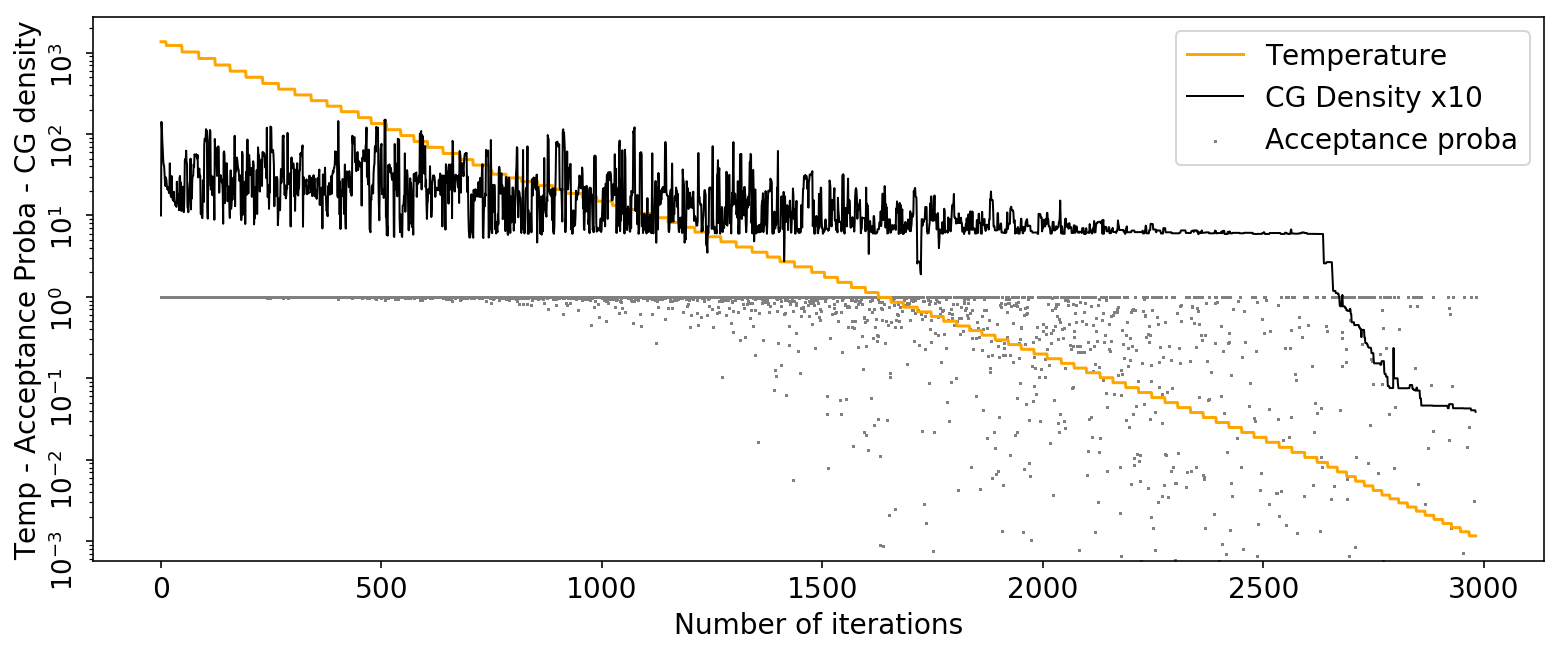

In [67]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction3D.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=1, density_factor=10)

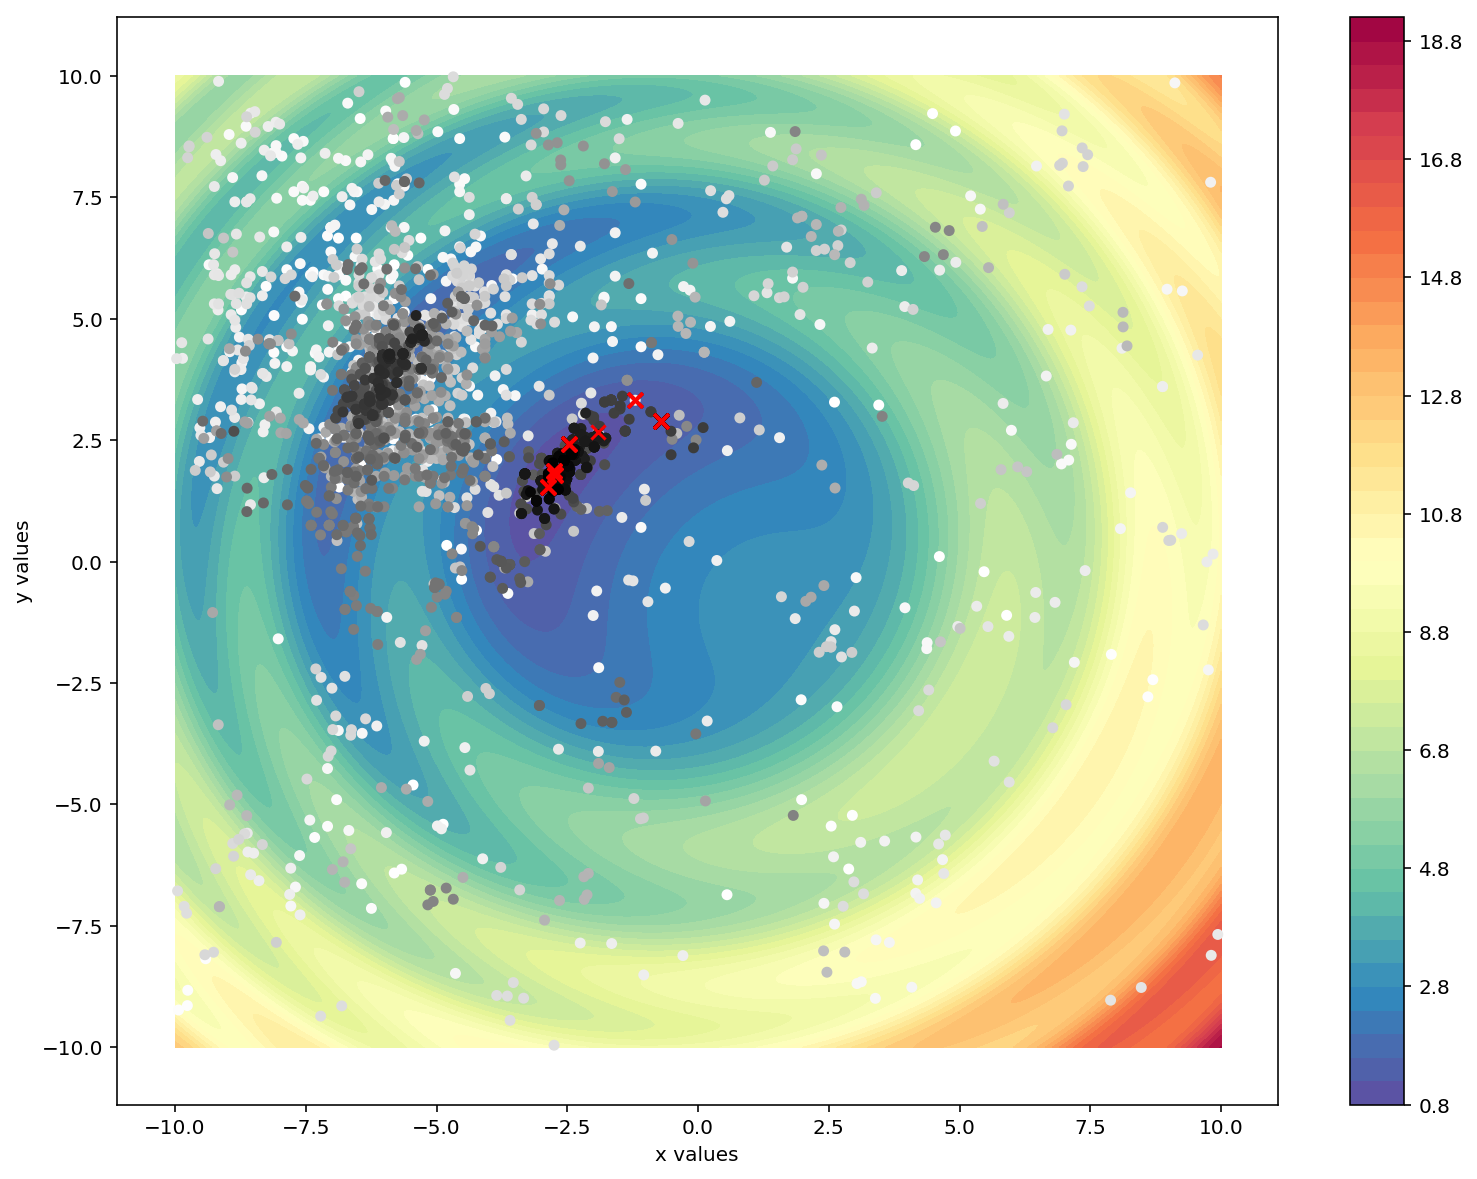

In [17]:
curr_x = curr_xs[0]
best_x = best_xs[0]
curr_x2 = curr_xs[1]
best_x2 = best_xs[1]
#print(curr_xs)
drawSolutionDSAMF3D(curr_x2, best_x2, curr_x, best_x)

#      <span style="color:green"><u>Min Function 4D</u></span>

In [ ]:
path = "../java/SimulatedAnnealing/GraphData/DSA_MinFunction4D.txt"
acceptance_pb, acc_best_sol, temp, density, markov_len, best_y, curr_y, best_xs, curr_xs, runtime, iteration_nbr = processDataDSA(path)
drawPlotDSA(best_y, curr_y, temp, acceptance_pb, acc_best_sol, density, markov_len, prob_factor=100, density_factor=10)



# Univariate Analysis

## Visualizing one dimension

In [ ]:
data, data_cur, data_best, data_curCG = processData4D_panda('../java/SimulatedAnnealing/GraphData/DSA_MinFunction4D.txt')
data_curCG.head()

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

data.hist(bins=40, color='steelblue', edgecolor='black', linewidth=0.5,
              xlabelsize=8, ylabelsize=8, grid=False, layout=(2,4), range=[-5,5])


plt.tight_layout(rect=(0, 0.5, 2, 2))   
plt.savefig('foo.png', format='png', dpi=400)


Mettre où est la best solution finale !!!

# Multivariate Analysis

## Visualizing two dimensions

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(20, 6))
corr = data_curCG.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax1, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(bottom=0.1, right=0.8, top=0.9)

corr = data_best.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax2, cmap="coolwarm",fmt='.2f', linewidths=.05)
f.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
ax1.set_title('Current Axis (from Controlled Generation)')
ax2.set_title('Best Axis')

t= f.suptitle('Correlation Heatmap                                         ', fontsize=14)

La corrélattion est vraiment biaisée car tous les points sont regroupés en un point à chaque fois, et les quelques points hors minima global qui sont atteints changent drastiquement la corrélation. La représentation visuelle des corrélations est représentée juste en dessous. D'ailleurs cette corrélation change à chaque fois qu'on rerun l'algo, même si il trouve le résultat à chaque fois !

A noter que dans le graph de gauche, on a bien CURR en f° des CURR et non pas des BEST, faute de label d'axe

In [ ]:
pp = sns.pairplot(data_best, height=1.6, aspect=1.8,markers="+",
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

f.subplots_adjust(top=1, wspace=0.3)
t = f.suptitle('Best Axis Pairwise Plots', fontsize=14)

In [ ]:
pp = sns.pairplot(data_cur, height=1.8, aspect=1.8,markers="+",
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

f.subplots_adjust(top=1, wspace=0.3)
t = f.suptitle('Current Axis Pairwise Plots', fontsize=14)


#### Est-ce qu'il faudrait pas plutôt que plot les valeurs ne venant que du Controlled Generation ? 

In [ ]:
pp = sns.pairplot(data_curCG, height=1.8, aspect=1.8,
                  plot_kws={'edgecolor':"k", 'linewidth':0.5, 'alpha':0.1, 'edgecolor': 'w', 'color':'darkred'},
                  diag_kind="hist", diag_kws={'bins':50, 'color':'black', 'edgecolor': 'w'})

### Two Continuous Numeric attributes 

In [ ]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize=(20, 6))

ax1.scatter(data_curCG['CURR x'], data_curCG['CURR x2'], alpha=0.4, edgecolors='w')
ax1.set_title('X = CURR x (from CG)        Y = CURR x2 (from CG)',y=1.05)

ax2.scatter(data_curCG['CURR x'], data_curCG['CURR x3'], alpha=0.4, edgecolors='w', c = 'darkred')
ax2.set_title('X = CURR x (from CG)        Y = CURR x3 (from CG)',y=1.05)

ax3.scatter(data_curCG['CURR x2'], data_curCG['CURR x3'], alpha=0.4, edgecolors='w', c= 'darkgreen')
ax3.set_title('X = CURR x2 (from CG)        Y = CURR x3 (from CG)',y=1.05)


In [ ]:
JP1 = sns.jointplot(x='CURR x', y='CURR x2', data=data_curCG, kind='scatter', space=0, height=5, ratio=4,
                    joint_kws={'alpha':0.1},
                    marginal_kws={'bins': 50, 'color':'darkblue'})
JP2 = sns.jointplot(x='CURR x', y='CURR x3', data=data_curCG, kind='scatter', space=0, height=5, ratio=4, color = 'darkred',
                    joint_kws={'alpha':0.1},
                    marginal_kws={'bins': 50})
JP3 = sns.jointplot(x='CURR x2', y='CURR x3', data=data_curCG, kind='scatter', space=0, height=5, ratio=4, color = 'darkgreen',
                    joint_kws={'alpha':0.1},
                    marginal_kws={'bins': 50})

Lancer l'algo 500 fois et comparé les résultats finaux à chaque (avec un bruit à chaque fois)

Parralel coordinates a faire avec les 500 fois lancé avec dégradé en fonction de la best solution



In [ ]:
data_mult = processData_stocha('../java/SimulatedAnnealing/GraphData/DSA_MinFunction4D_Stocha.txt')
data_mult = data_mult.sort_values(by=['BEST y'])[::-1]
data_mult.head()

### Statistics on all the 500 runs

In [ ]:
rs = data_mult.describe()
rs

Le maximum Global est atteint en :

In [ ]:
isGlobalBest = data_mult['BEST y']==data_mult['BEST y'].min()
data_mult[isGlobalBest]

In [ ]:
# redefinition of parallel_coordinates function in order to plot the color bar


# also see : http://benalexkeen.com/parallel-coordinates-in-matplotlib/

def parallel_coordinates(frame, class_column, cols=None, ax=None, color=None,
                     use_columns=False, xticks=None, colormap=None,
                     **kwds):
    import matplotlib.pyplot as plt
    import matplotlib as mpl

    n = len(frame)
    class_col = frame[class_column]
    class_min = np.amin(class_col)
    class_max = np.amax(class_col)

    if cols is None:
        df = frame.drop(class_column, axis=1)
    else:
        df = frame[cols]

    used_legends = set([])

    ncols = len(df.columns)

    # determine values to use for xticks
    if use_columns is True:
        if not np.all(np.isreal(list(df.columns))):
            raise ValueError('Columns must be numeric to be used as xticks')
        x = df.columns
    elif xticks is not None:
        if not np.all(np.isreal(xticks)):
            raise ValueError('xticks specified must be numeric')
        elif len(xticks) != ncols:
            raise ValueError('Length of xticks must match number of columns')
        x = xticks
    else:
        x = range(ncols)

    fig = plt.figure(figsize=(20,10))
    ax = plt.gca()

    Colorm = plt.get_cmap(colormap)

    for i in range(n):
        y = df.iloc[i].values
        kls = class_col.iat[i]
        ax.plot(x, y, color=Colorm((kls - class_min)/(class_max-class_min)), **kwds)

    for i in x:
        ax.axvline(i, linewidth=1, color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(df.columns)
    ax.set_xlim(x[0], x[-1])
    ax.legend(loc='upper right')
    ax.grid()
    ax.set_facecolor('navajowhite')


    bounds = np.linspace(class_min,class_max,10)
    cax,_ = mpl.colorbar.make_axes(ax)
    cb = mpl.colorbar.ColorbarBase(cax, cmap=Colorm, spacing='proportional', ticks=bounds, boundaries=bounds, format='%.5f')

    return fig

In [ ]:
plt.close()
plt.gcf().clear()    

parallel_coordinates(data_mult, 'BEST y', colormap = 'Greys')
plt.ylabel("BEST y values")

#plt.figure(figsize=(20,10))